<h1>Collaborative Filtering</h1>

Using Fastai collaborative filtering approach to movielens dataset.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

Loading Fastai libraries

In [3]:
from fastai.imports import *
from fastai.collab import * 
from fastai.tabular import *

In [4]:
PATH = 'C:/Users/Alan/.fastai/data/movie/'
PATH

'C:/Users/Alan/.fastai/data/movie/'

In [5]:
df_train = pd.read_csv(f'{PATH}edx.csv', sep=';',header=0)
df_test = pd.read_csv(f'{PATH}test_set.csv',sep=';',header=0)

In [9]:
df_train.head()

,userId,movieId,rating,timestamp,title,genres
0,1,122,5,838985046,Boomerang (1992),Comedy|Romance
1,1,185,5,838983525,"Net, The (1995)",Action|Crime|Thriller
2,1,292,5,838983421,Outbreak (1995),Action|Drama|Sci-Fi|Thriller
3,1,316,5,838983392,Stargate (1994),Action|Adventure|Sci-Fi
4,1,329,5,838983392,Star Trek: Generations (1994),Action|Adventure|Drama|Sci-Fi


In [8]:
del df_train['id']

KeyError: 'id'

In [10]:
df_train['rating'].unique()

array(['5', '3', '2', '4', '4,5', '3,5', '1', '1,5', '2,5', '0,5'], dtype=object)

In [11]:
df_train['rating'] = df_train['rating'].str.replace('\,','.')

In [12]:
data = CollabDataBunch.from_df(df_train, valid_pct=0.2,test=df_test)

In [13]:
learn = collab_learner(data, n_factors=40, y_range=(0.,5.5))

In [14]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


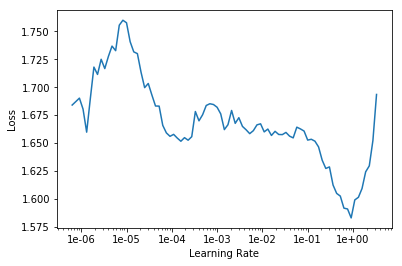

In [15]:
learn.recorder.plot()

In [16]:
learn.fit_one_cycle(4, 0.5, wd=0.1)

epoch,train_loss,valid_loss,time
0,2.020535,2.024749,22:43
1,1.759615,1.781090,23:23
2,0.875797,0.889288,23:45


In [25]:
gc.collect()

7566

In [20]:
learn.save('dotprod')

In [21]:
learn = collab_learner(data, n_factors=40, y_range=(0.,5.5), use_nn=True,layers=[200,100])

In [22]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


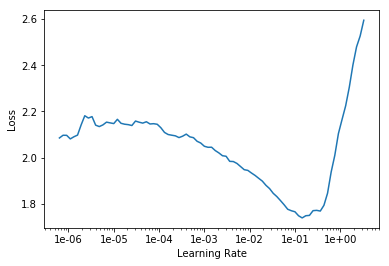

In [23]:
learn.recorder.plot()

In [24]:
learn.fit_one_cycle(4, 5e-02, wd=0.1)

epoch,train_loss,valid_loss,time


KeyboardInterrupt: 